In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
blobs = pd.read_csv('../course_notebooks/DATA/cluster_blobs.csv')
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<AxesSubplot:xlabel='X1', ylabel='X2'>

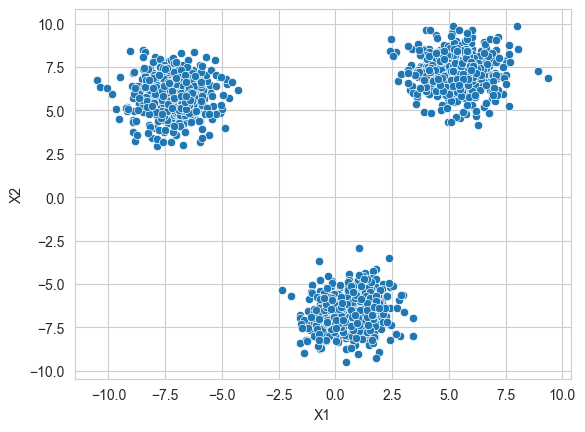

In [3]:
sns.scatterplot(data=blobs,x='X1',y='X2')

In [4]:
moons = pd.read_csv('../course_notebooks/DATA/cluster_moons.csv')
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


<AxesSubplot:xlabel='X1', ylabel='X2'>

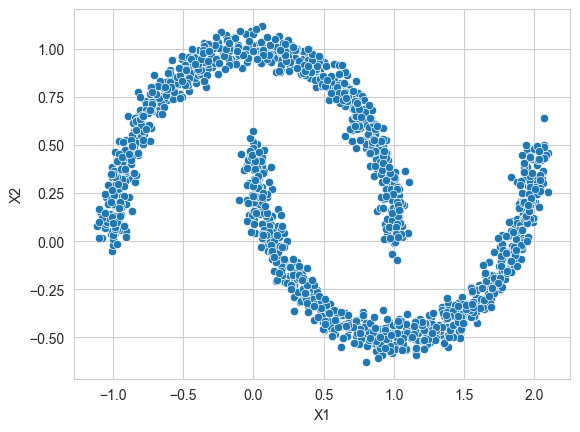

In [5]:
sns.scatterplot(data=moons,x='X1',y='X2')

In [6]:
circles = pd.read_csv('../course_notebooks/DATA/cluster_circles.csv')
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


<AxesSubplot:xlabel='X1', ylabel='X2'>

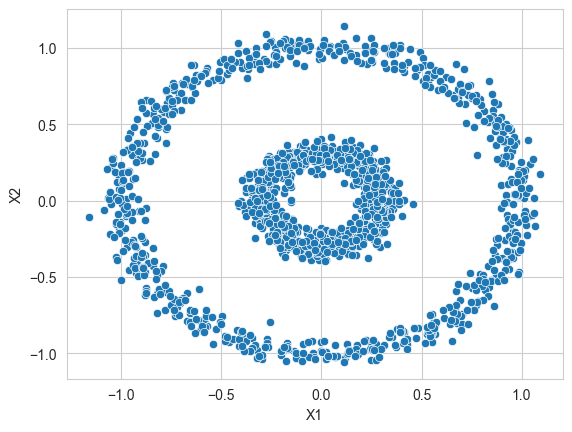

In [7]:
sns.scatterplot(data=circles,x='X1',y='X2')


In [8]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data,x='X1',y='X2',hue=labels,palette='Set1')

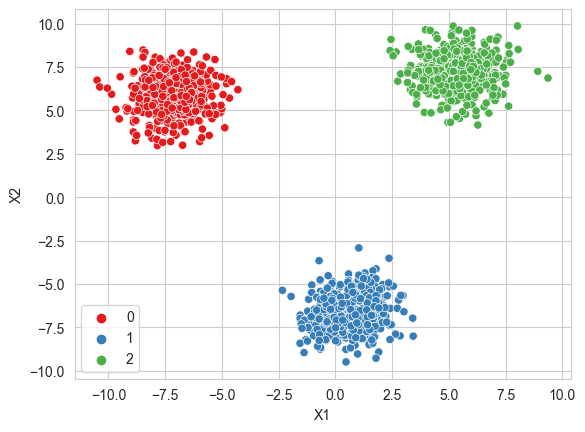

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
display_categories(kmeans,blobs)

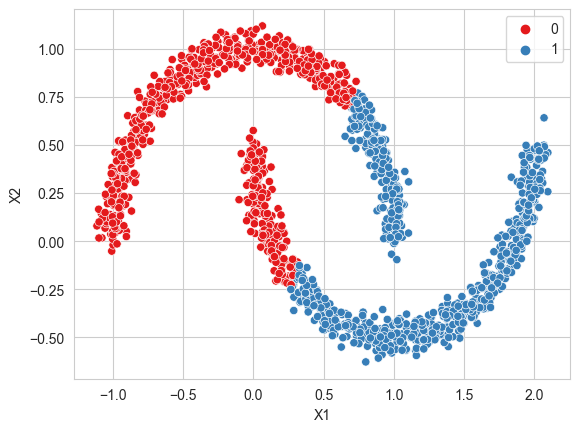

In [10]:
kmeans = KMeans(n_clusters=2)
display_categories(kmeans,moons)

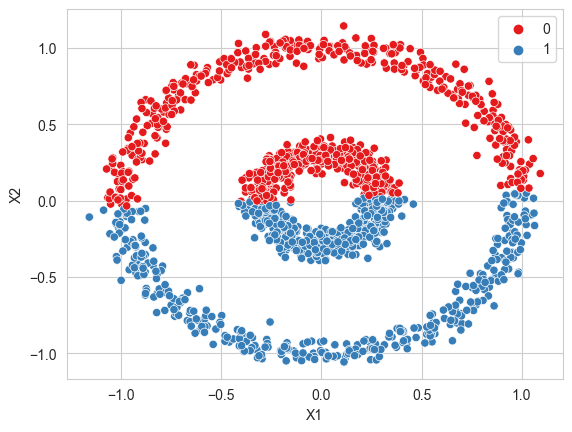

In [11]:
display_categories(kmeans,circles)

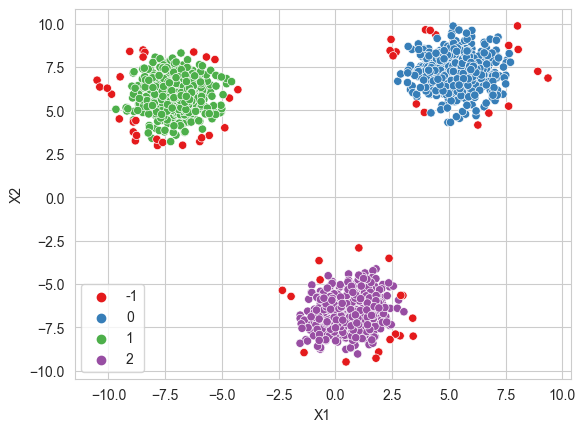

In [12]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
display_categories(dbscan,blobs)

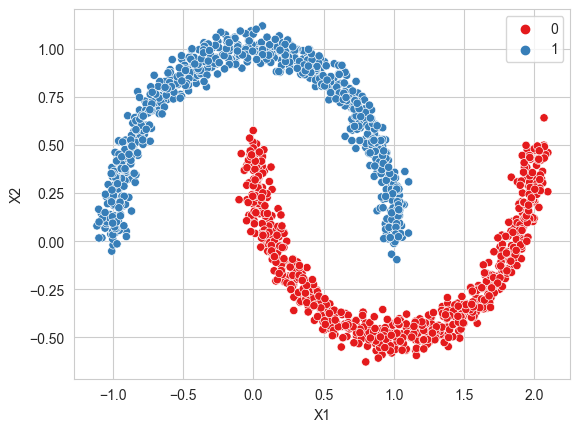

In [15]:
dbscan = DBSCAN(eps=0.15)
display_categories(dbscan,moons)

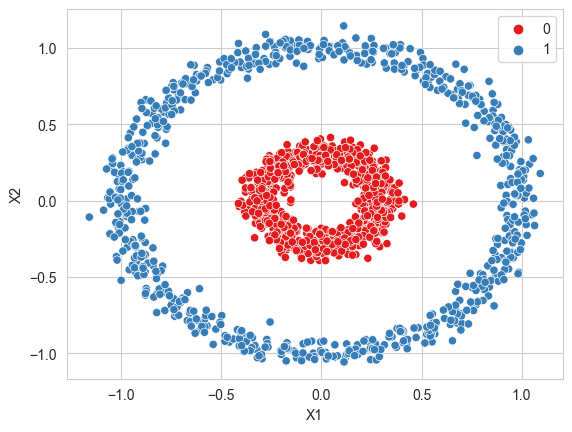

In [16]:
display_categories(dbscan,circles)

In [17]:
two_blobs = pd.read_csv('../course_notebooks/DATA/cluster_two_blobs.csv')
two_blobs_outliers = pd.read_csv('../course_notebooks/DATA/cluster_two_blobs_outliers.csv')

<AxesSubplot:xlabel='X1', ylabel='X2'>

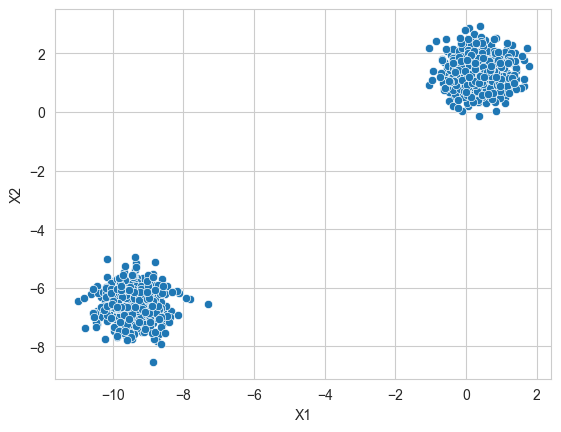

In [18]:
sns.scatterplot(two_blobs,x='X1',y='X2')

<AxesSubplot:xlabel='X1', ylabel='X2'>

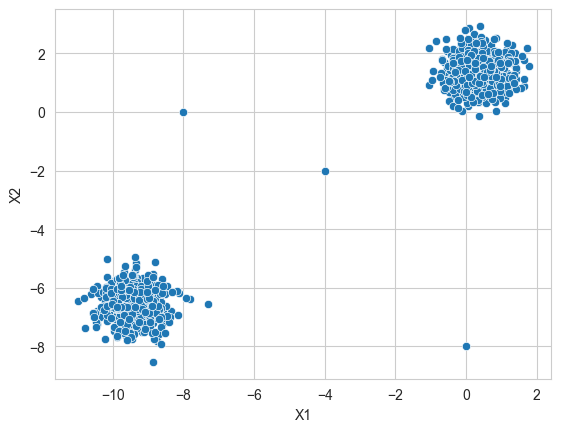

In [19]:
sns.scatterplot(two_blobs_outliers,x='X1',y='X2')

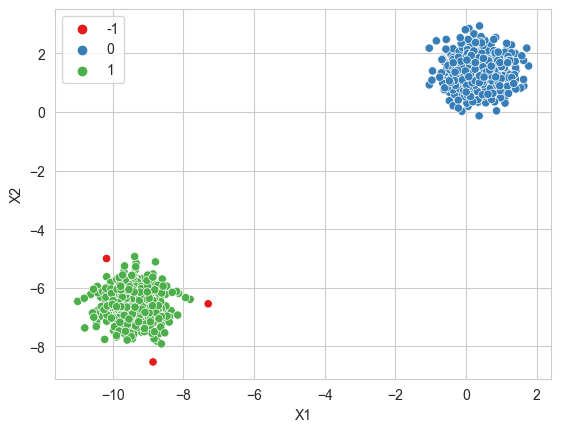

In [21]:
display_categories(DBSCAN(),two_blobs)

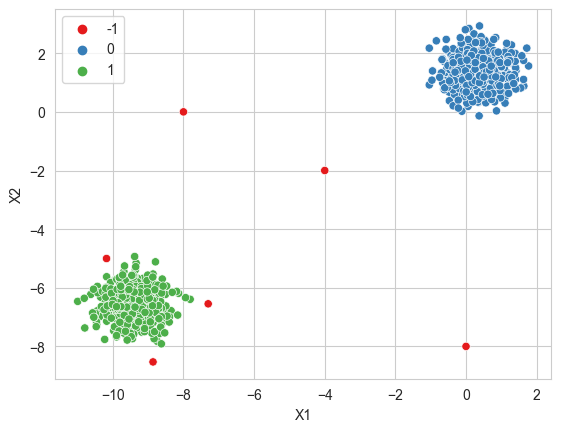

In [22]:
display_categories(DBSCAN(),two_blobs_outliers)

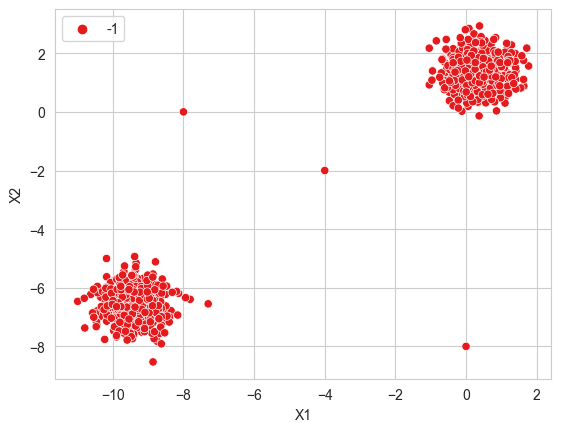

In [23]:
display_categories(DBSCAN(eps=0.001),two_blobs_outliers)

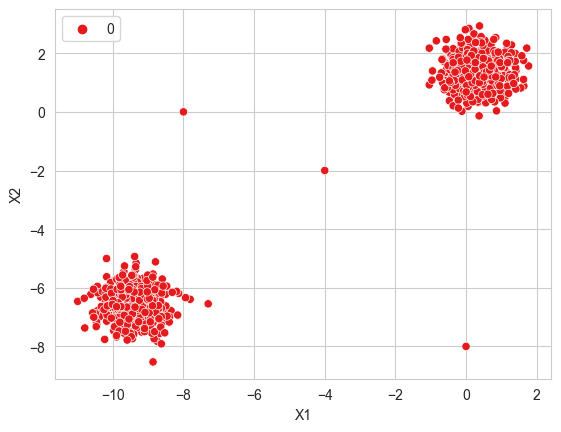

In [25]:
display_categories(DBSCAN(eps=10),two_blobs_outliers)

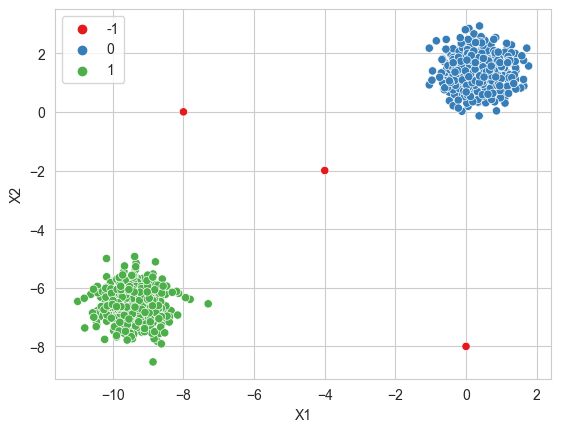

In [27]:
dbscan = DBSCAN(eps=1)
display_categories(dbscan,two_blobs_outliers)

In [28]:
np.sum(dbscan.labels_ == -1)

3

In [29]:
outlier_percent = []
number_of_outliers = []
for eps in np.linspace(0.001,10,100):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    total = np.sum(dbscan.labels_ == -1)
    number_of_outliers.append(total)
    outlier_percent.append(100*total/len(dbscan.labels_))

(0.001, 0.6)

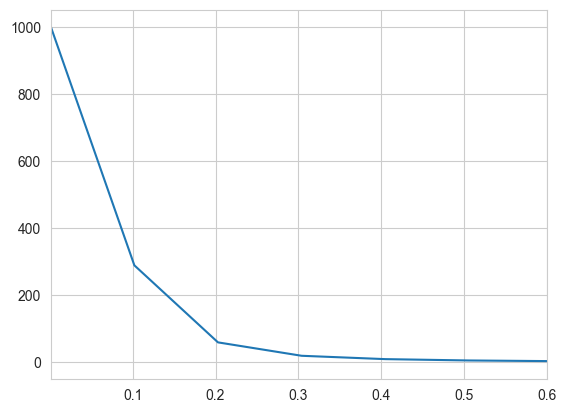

In [32]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.xlim(0.001,0.6)

In [33]:
def elbow(start, finish, count):
    number_of_outliers = []
    for eps in np.linspace(start,finish,count):
        dbscan = DBSCAN(eps=eps)
        dbscan.fit(two_blobs_outliers)
        number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    sns.lineplot(x=np.linspace(start,finish,count),y=number_of_outliers)


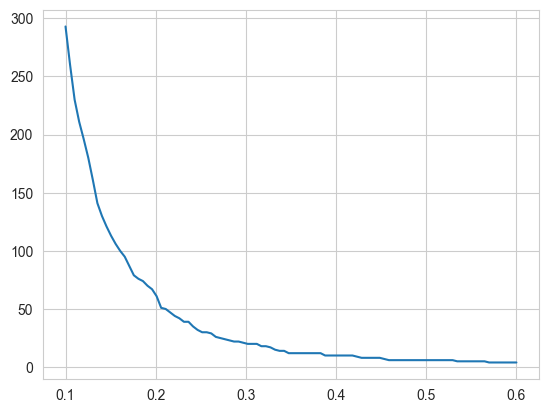

In [34]:
elbow(0.1,0.6,100)

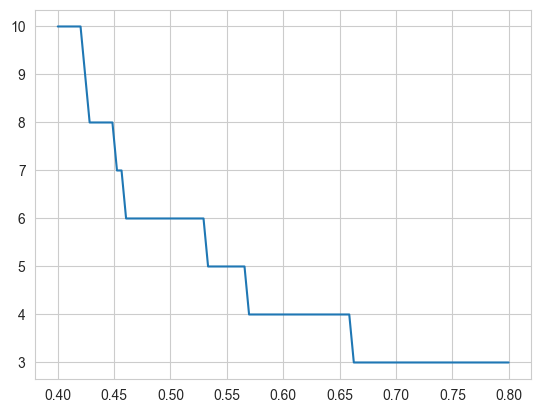

In [35]:
elbow(0.4,0.8,100)

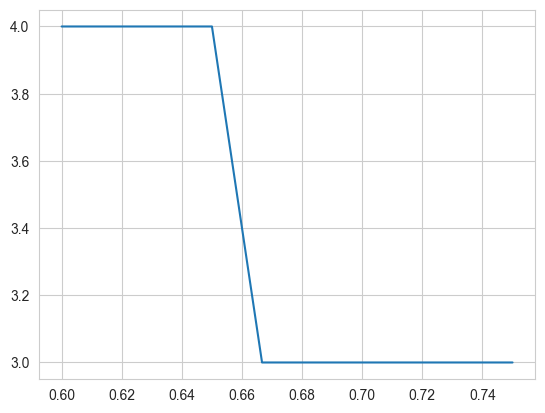

In [36]:
elbow(0.6,0.75,10)


In [43]:
def elbow_min_samples(start, finish):
    number_of_outliers = []
    for min_samples in np.arange(start,finish):
        dbscan = DBSCAN(min_samples=min_samples,eps=0.75)
        dbscan.fit(two_blobs_outliers)
        number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    sns.lineplot(x=np.arange(start,finish),y=number_of_outliers)

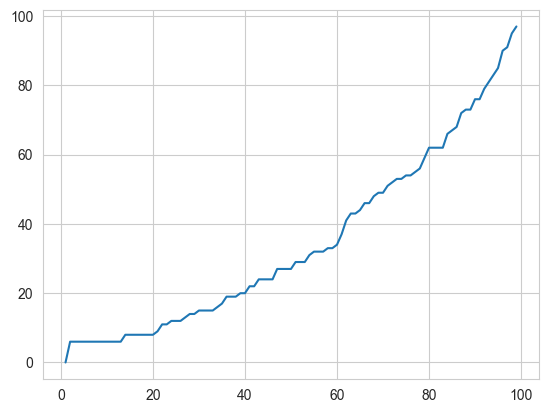

In [38]:
elbow_min_samples(1,100)

(0.0, 5.0)

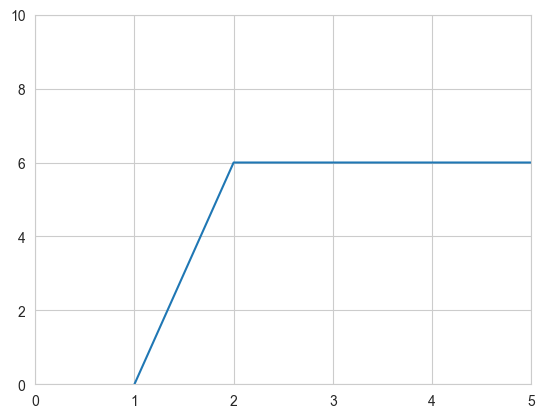

In [40]:
elbow_min_samples(1,100)
plt.ylim(0,10)
plt.xlim(0,5)

(0.0, 5.0)

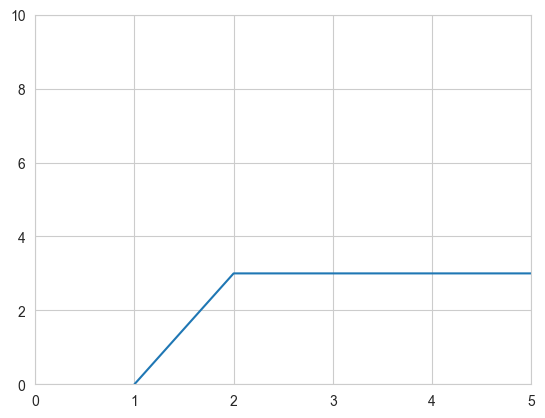

In [45]:
elbow_min_samples(1,100)
plt.ylim(0,10)
plt.xlim(0,5)

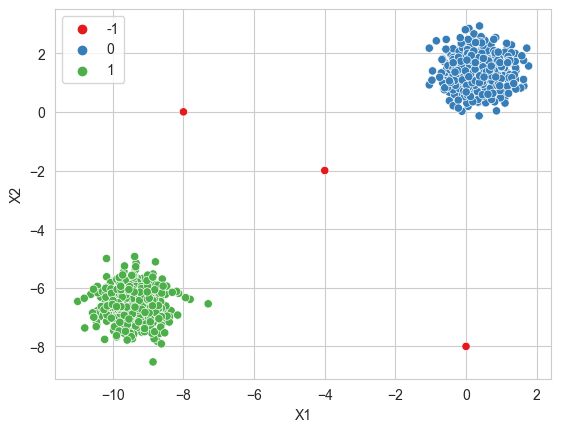

In [42]:
num_dim = two_blobs_outliers.shape[1]
dbscan = DBSCAN(min_samples=2*num_dim,eps=0.75)
display_categories(dbscan,two_blobs_outliers)
